# Project 5: K-Means Clustering


# Project Description

For this project you will implement a **K-means** clustering algorithm.


## Data File

Two text files with the data is available on Canvas: a data file and a centroids file. You need to write a code to read data from the two files. 

The **data file** will be formatted with the first line containing m and n, tab separated, where m is the number of lines of data and n is the number of features (for this assignment n will be 2 but assume we still put it into the file.)

Each line will contain two real values (feature $x_1$ and feature $x_2$), tab separated. Such as the following:
```

4	2
6.3	6.0
6.7	5.8
5.7	4.1
5.6	3.9
```
The **centroid file** containing two initial centroids, formatted with the number of centroids on the first line and the coordinates of each centroid on the following lines, one centroid per line, tab separated. Such as:
```
2
4 4
6 6
```

You **can** use packages, such as **panda**, to load the data.


In [1]:
##############################################################################
#         TODO: Write the code for reading data from files                    #
##############################################################################
import pandas as pd
import numpy as np

# Function to load centroids from the file
def load_centroids(file_path):
    with open(file_path, 'r') as file:
        num_centroids = int(file.readline().strip())
        centroids = np.array([list(map(float, line.strip().split('\t'))) for line in file])
    return centroids

# Function to load data points from the file
def load_data(file_path):
    with open(file_path, 'r') as file:
        m, n = map(int, file.readline().strip().split('\t'))
        data = np.array([list(map(float, line.strip().split('\t'))) for line in file])
    return data

centroids = load_centroids('P5_Centroids.txt')
data = load_data('P5_Data.txt')

##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

Next, you need to print out a plot of the data to the screen, including the two initial centroids (color coded) like the following figure:

<div>
<img src="https://nianyil.people.clemson.edu/CPSC_4430/P5_1.jpg" width="400"/>
</div>

## K-means Clustering

Implement K-means (**K=2**) to cluster the data into two groups.

In [2]:
##############################################################################
#                TODO: Implement the K-means clustering                      #
##############################################################################
def k_means(data, initial_centroids, max_iters=100):
    centroids = np.array(initial_centroids)
    for _ in range(max_iters):
        expanded_centroids = np.expand_dims(centroids, axis=1)
        expanded_data = np.expand_dims(data, axis=0)
        distances = np.sqrt(np.sum((expanded_data - expanded_centroids) ** 2, axis=2))
        closest_centroids = np.argmin(distances, axis=0)
        new_centroids = []

        for k in range(len(centroids)):
            cluster_data = data[closest_centroids == k]
            if cluster_data.size:
                new_centroids.append(cluster_data.mean(axis=0))
            else:
                new_centroids.append(centroids[k])
        new_centroids = np.array(new_centroids)

        if np.allclose(centroids, new_centroids, atol=1e-5):
            break
        centroids = new_centroids

    return closest_centroids, centroids
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

Once the algorithm converged, print out a plot of the cluster data with each cluster color coded along with the final centroids like the following:
<div>
<img src="https://nianyil.people.clemson.edu/CPSC_4430/P5_2.jpg" width="400"/>
</div>

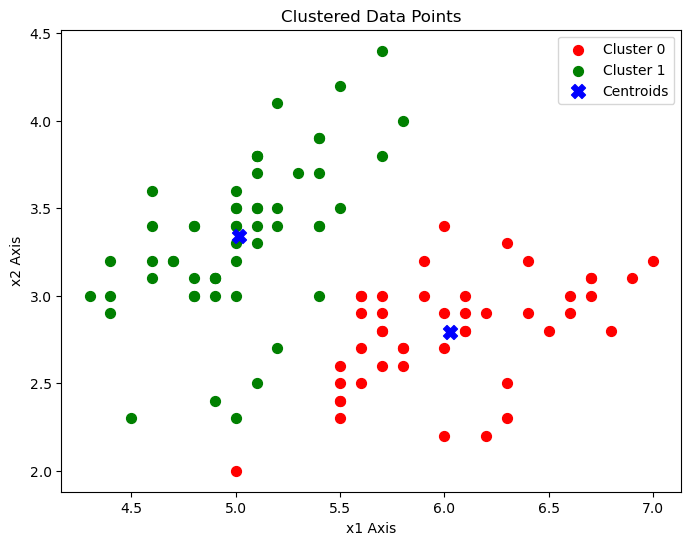

In [3]:
##############################################################################
#                TODO: Plot the clustering result                           #
##############################################################################
import matplotlib.pyplot as plt

def plot_k_means(data, centroids, labels):
    plt.figure(figsize=(8, 6))
    colors = ['red', 'green']
    
    for i in range(len(centroids)):
        points = data[labels == i]
        plt.scatter(points[:, 0], points[:, 1], s=50, c=colors[i], label=f'Cluster {i}')

    plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='blue', label='Centroids', marker='X')
    plt.title('Clustered Data Points')
    plt.xlabel('x1 Axis')
    plt.ylabel('x2 Axis')
    plt.legend()
    plt.show()
    
labels, final_centroids = k_means(data, centroids)
plot_k_means(data, final_centroids, labels)
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

Next, print out the coordinates of the final centroids.

In [4]:
##############################################################################
#       TODO: print out the final centroids' coordinates                     #
##############################################################################
print("Final centroids' coordinates:")
print(final_centroids)
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

Final centroids' coordinates:
[[6.02666667 2.79111111]
 [5.01636364 3.34181818]]


## Model Evaluation

Compute and **print out the overall error** (J function presented in the course slides) for the entire data set.


In [5]:
##############################################################################
#                           TODO: Model Evaluation                           #
##############################################################################
def compute_cost_function(data, centroids, labels):
    m = data.shape[0] # number of data points
    J = 0
    for i in range(len(centroids)):
        cluster_data = data[labels == i]
        J += np.sum((cluster_data - centroids[i]) ** 2)
    J /= m # divide by the number of data points to average
    return J

J = compute_cost_function(data, final_centroids, labels)
print(f"The overall error (cost function J) for the dataset is: {J}")
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

The overall error (cost function J) for the dataset is: 0.30433535353535357
